In [13]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import pandas as pd

# Segmentation

In [14]:
from PIL import Image
img0 = Image.open('C:/Users/ASUS/Desktop/healthy.png').convert('L')
image0_segmented = img0.resize((28,28))
img1 = Image.open('C:/Users/ASUS/Desktop/0c4e75b2-e4aa-437e-815c-636271d66bec___JR_B.Spot 3244.jpg').convert('L')
image1 = img1.resize((28,28))
img1_segmented = Image.open('C:/Users/ASUS/Desktop/graph cut.png').convert('L')
image1_segmented = img1_segmented.resize((28,28))

In [15]:
image0_segmented

In [16]:
image1_segmented

In [17]:
image1

In [19]:
data0_segmented = np.asarray(image0_segmented)
data1 = np.asarray(image1)
data1_segmented = np.asarray(image1_segmented)

In [20]:
def display(data, txt):
    np.set_printoptions(linewidth=200, precision=2)
    print(data)
    plt.imshow(data, cmap = 'gray')
    plt.axis('off')
    plt.title(txt)

[[242 248 248 248 248 248 248 248 248 248 248 248 248 248 248 249 255 252 244 248 248 248 248 248 248 248 248 241]
 [250 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 202  89 199 255 255 255 255 255 255 255 255 248]
 [249 255 255 255 255 255 255 255 255 255 255 255 255 255 234 101   9   0 143 255 255 255 255 255 255 255 255 247]
 [249 255 255 255 255 255 255 255 255 255 255 255 255 191  36   0   0   9 211 255 255 255 255 255 255 255 255 247]
 [249 255 255 255 255 255 255 255 255 255 183  97  76  18   0   0  46 171 147 176 251 255 255 255 255 255 255 247]
 [249 255 255 255 255 255 255 255 223  79   0   0   0   0   0   0  27  72   0   0  72 231 255 255 255 255 255 247]
 [249 255 255 255 255 255 255 227  43   0   0   0   0   0   0   0   0   0   0   0   0  57 235 255 255 255 255 247]
 [249 255 255 255 255 255 248  71   0   0   0   0   0   0   0   0   0   0   0   0   0   0  53 230 255 255 255 247]
 [249 255 255 255 255 224  80   0   0   0   0   0   0   0   0   0   0   0   0   

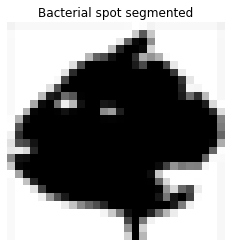

In [21]:
display(data1_segmented,"Bacterial spot segmented")

[[134 135 134 139 139 140 137 135 139 139 138 135 132 134 135 137 141 136 129 144 141 135 141 148 147 147 140 134]
 [138 138 135 138 137 137 138 139 143 140 139 140 135 134 139 145 116  81 118 134 129 137 137 141 145 150 148 139]
 [137 139 140 139 141 144 143 145 143 139 139 138 137 143 137  68  49 110  92  49 121 139 135 140 141 143 143 138]
 [139 138 143 142 142 145 142 141 141 144 143 143 146 118  53  11  93 151  36  73 144 140 138 135 141 138 132 131]
 [138 140 144 146 140 142 140 145 148 145 102  62  52  30  18  39 128 143 114 148 142 145 144 137 135 133 137 133]
 [135 138 140 146 144 146 147 156 132  57  31  43  32  42  51 106 141 147 179 176 147 131 140 148 141 134 137 136]
 [141 142 142 147 151 146 151 142  58  13  69  96  60  46  67 127 129 128 146 152 155 138  76 113 144 140 141 139]
 [143 145 144 149 152 151 147  68  18  30  68 120  83  40  62 141 146 154 149 127 149 149 122  50  79 144 143 141]
 [143 142 146 148 153 142  72  27  19  62  73  88 111  80  73 158 170 163 103 10

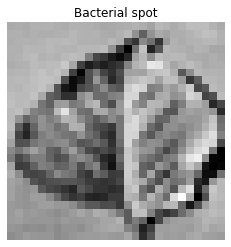

In [22]:
display(data1,"Bacterial spot")

[[255 255 255 255 255 255 255 255 255 255 255 255 237 208 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 117  18 223 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 155   5   0  84 252 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 209  23   0   0   0 193 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 158  34   0   0   0   0  47 217 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 244 120   8   0   0   0   0   0   0  21 163 253 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 243  71   0   0   0   0   0   0   0   0   0   0  82 217 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 248  83   0   0   0   0   0   0   0   0   0   0   0   0  27 188 255 255 255 255 255 255 255]
 [255 255 255 255 255 155   0   0   0   0   0   0   0   0   0   0   0   0   0   

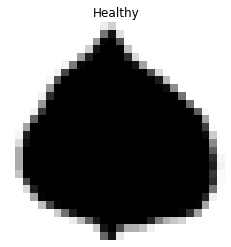

In [23]:
display(data0_segmented,"Healthy")

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Random Brightness

Found 20638 images belonging to 15 classes.


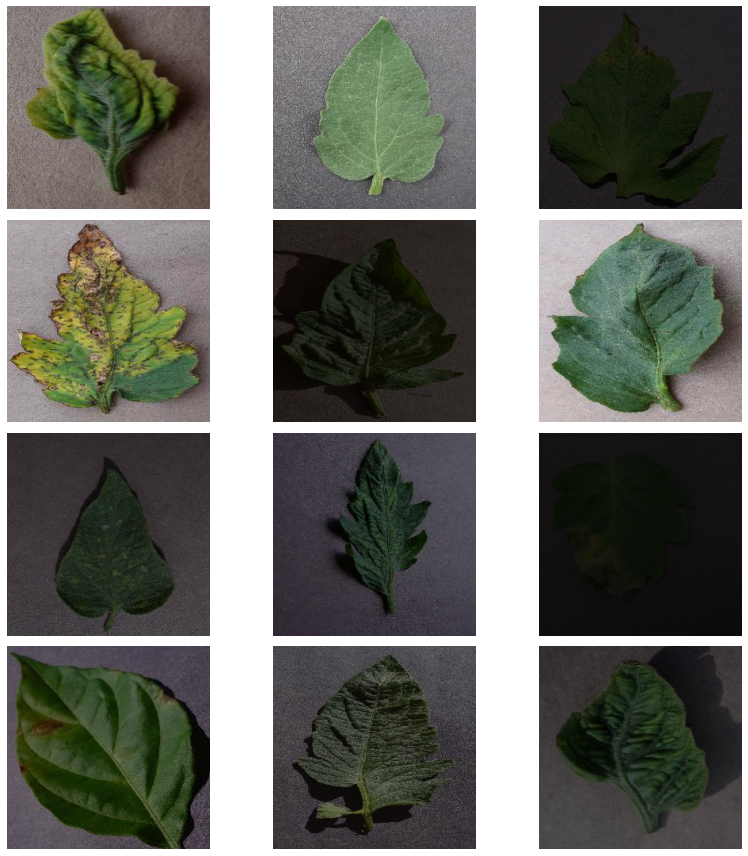

In [25]:
train_datagen = ImageDataGenerator(rescale = 1.0/255, brightness_range=[0.1,1.0])
train_generator = train_datagen.flow_from_directory("D:/PlantVillage/", target_size = (256,256), batch_size = 20)
plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(4, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        plt.axis('off')
        break
plt.tight_layout()
plt.show()

# Random Zoom and Rotation

Found 20638 images belonging to 15 classes.


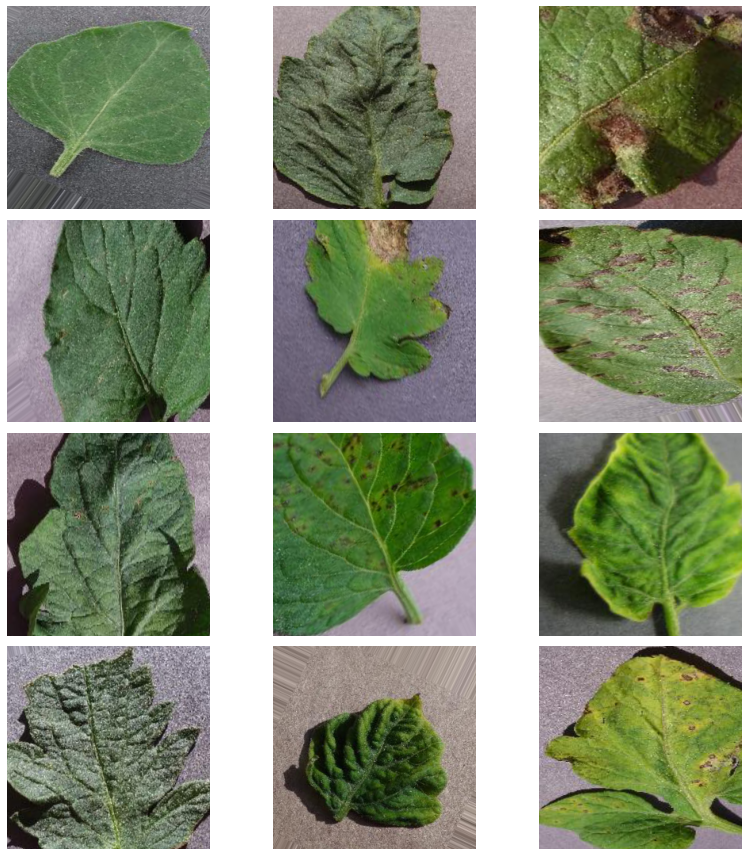

In [26]:
train_datagen = ImageDataGenerator(rescale = 1.0/255, rotation_range = 30, shear_range = 0.2, horizontal_flip = True, fill_mode = 'nearest', width_shift_range = 0.1, height_shift_range = 0.1, zoom_range=[0.5,1.0])
train_generator = train_datagen.flow_from_directory("D:/PlantVillage/", target_size = (256,256), batch_size = 20)
plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(4, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        plt.axis('off')
        break
plt.tight_layout()
plt.show()